In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import pandas as pd
import numpy as np
import warnings
import sys
import pickle

In [2]:
# suppressing warning messages

warnings.filterwarnings('ignore')

In [3]:
sys.path.insert(1, '../scripts')

from data_viz import Data_Viz
from data_cleaning import DataCleaner
from data_transformation import DataTransformer

DV = Data_Viz("../logs/deep_model_notebook.log")
DC = DataCleaner("../logs/deep_model_notebook.log")
DT = DataTransformer("../logs/deep_model_notebook.log")

In [4]:
# importing the data

train = pd.read_csv("../data/train_store.csv")

In [5]:
# checking available variables
DV.summ_columns(train)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,float64,13194
4,Customers,0,0.0,float64,1423
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,4
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


In [6]:
# extracting relevant variables

date_variables = ["Sales", "Date", "Year", "Month", "DayOfMonth", "WeekOfYear"]
selected_df = train[date_variables]
selected_df = selected_df.sort_values(by="Date")
print("rows and columsn: ", selected_df.shape)
DV.summ_columns(selected_df) 

rows and columsn:  (1017209, 6)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Sales,0,0.0,float64,13194
1,Date,0,0.0,object,942
2,Year,0,0.0,int64,3
3,Month,0,0.0,int64,12
4,DayOfMonth,0,0.0,int64,31
5,WeekOfYear,0,0.0,int64,52


In [7]:
# Sales per Day

tsa_df_days = selected_df[["Date", "Sales"]].groupby(["Date"]).agg({"Sales":"sum"})

print("rows and columns: ", tsa_df_days.shape)
DV.summ_columns(tsa_df_days)

rows and columns:  (942, 1)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Sales,0,0.0,float64,942


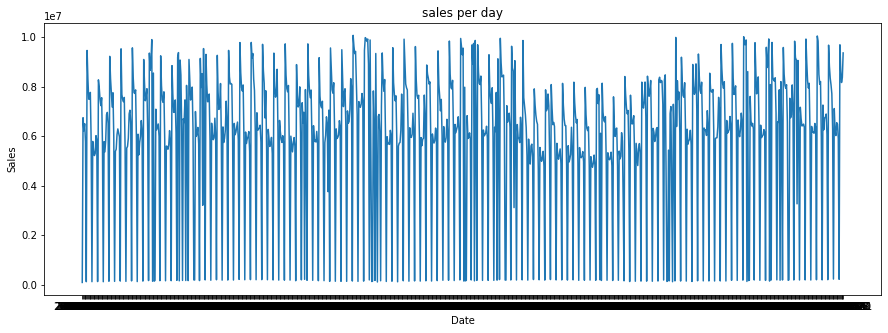

In [8]:
DV.plot_line(tsa_df_days, "Date", "Sales", [15, 5], "sales per day", "sales_day.png")

In [17]:
#Sales per week
selected_df["Date"] = pd.to_datetime(selected_df["Date"])
selected_df["Year_Week"] = selected_df["Date"].apply(lambda x: x.strftime("%Y/W%V"))
print("rows and columns: ", selected_df.shape)
DV.summ_columns(selected_df)

rows and columns:  (1017209, 7)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Sales,0,0.0,float64,13194
1,Date,0,0.0,datetime64[ns],942
2,Year,0,0.0,int64,3
3,Month,0,0.0,int64,12
4,DayOfMonth,0,0.0,int64,31
5,WeekOfYear,0,0.0,int64,52
6,Year_Week,0,0.0,object,135


In [27]:
encoder = LabelEncoder()
selected_df["Year_Week"]= encoder.fit_transform(selected_df["Year_Week"])
tsa_df_weeks = selected_df[["Year_Week", "Sales"]].groupby(["Year_Week"])
DV.plot_line(tsa_df_weeks, "Year_Week", "Sales", [15, 5], "sales per day", "sales_day.png")

ValueError: Could not interpret value `Year_Week` for parameter `x`

<Figure size 1080x360 with 0 Axes>